In [64]:
import pandas as pd

import numpy as np


In [65]:
dataset=pd.read_csv("Data.csv")

In [66]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [67]:
dataset.shape

(10, 4)

In [68]:
x=dataset[["Country","Age", "Salary"]].values
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [69]:
y=dataset[["Purchased"]].values

y

array([['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['Yes'],
       ['Yes'],
       ['No'],
       ['Yes'],
       ['No'],
       ['Yes']], dtype=object)

In [70]:
from sklearn.impute import SimpleImputer

In [71]:
#only for practise

imputer=SimpleImputer(missing_values=np.nan, strategy="median")

imputer=imputer.fit(x[:,1:3])

x[:,1:3]=imputer.transform(x[:,1:3])

x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 61000.0],
       ['France', 35.0, 58000.0],
       ['Spain', 38.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [72]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')

In [73]:
imputer=imputer.fit(x[:,1:3])

In [74]:
x[:,1:3]=imputer.transform(x[:,1:3])

In [75]:
x

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 61000.0],
       ['France', 35.0, 58000.0],
       ['Spain', 38.0, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
label_encode_x=LabelEncoder()


In [78]:
x[:,0]=label_encode_x.fit_transform(x[:,0])

In [79]:
x

array([[0, 44.0, 72000.0],
       [2, 27.0, 48000.0],
       [1, 30.0, 54000.0],
       [2, 38.0, 61000.0],
       [1, 40.0, 61000.0],
       [0, 35.0, 58000.0],
       [2, 38.0, 52000.0],
       [0, 48.0, 79000.0],
       [1, 50.0, 83000.0],
       [0, 37.0, 67000.0]], dtype=object)

In [80]:
from sklearn.preprocessing import OneHotEncoder

In [81]:
onehotencoder=OneHotEncoder()

In [82]:
onehotencoder.fit_transform(dataset.Country.values.reshape(-1,1)).toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [83]:
labelencoder_y=LabelEncoder()

In [84]:
y=labelencoder_y.fit_transform(y)

C:\Users\Milan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.2, random_state=0)

In [88]:
x_train

array([[1, 40.0, 61000.0],
       [0, 37.0, 67000.0],
       [2, 27.0, 48000.0],
       [2, 38.0, 52000.0],
       [0, 48.0, 79000.0],
       [2, 38.0, 61000.0],
       [0, 44.0, 72000.0],
       [0, 35.0, 58000.0]], dtype=object)

In [89]:
x_test

array([[1, 30.0, 54000.0],
       [1, 50.0, 83000.0]], dtype=object)

In [90]:
y_train

array([1, 1, 1, 0, 1, 0, 0, 1])

In [91]:
y_test

array([0, 0])

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
sc_x=StandardScaler()

In [94]:
x_train=sc_x.fit_transform(x_train)

In [95]:
x_test=sc_x.fit_transform(x_test)

In [96]:
x_train

array([[ 0.13483997,  0.27978024, -0.13108063],
       [-0.94387981, -0.23673712,  0.49810638],
       [ 1.21355975, -1.95846165, -1.49431914],
       [ 1.21355975, -0.06456467, -1.07486114],
       [-0.94387981,  1.65715986,  1.75648039],
       [ 1.21355975, -0.06456467, -0.13108063],
       [-0.94387981,  0.96847005,  1.02242888],
       [-0.94387981, -0.58108203, -0.44567413]])

In [97]:
import seaborn as sns

ValueError: could not convert string to float: 'No'

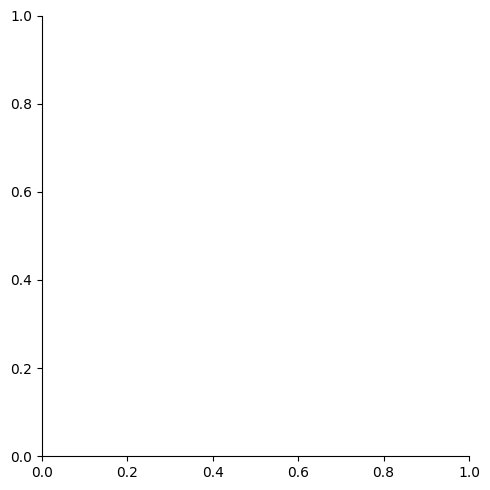

In [98]:
sns.lmplot(dataset, x="Age", y="Purchased")

plt.show()

In [99]:
x_test

array([[ 0., -1., -1.],
       [ 0.,  1.,  1.]])

In [100]:
from sklearn import linear_model

In [101]:
reg=linear_model.LinearRegression()

In [102]:
reg.predict

<bound method LinearModel.predict of LinearRegression()>